Title of the Assignment:
1. Implement logistic regression using Python/R to perform classification on
Social_Network_Ads.csv dataset.
2. Compute Confusion matrix to find TP, FP, TN, FN, Accuracy, Error rate, Precision,
Recall on the given dataset..

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# Step 2: Import the Social_Media_Adv Dataset (assuming CSV format)
url = r"C:\Users\Rutuja Habib\Downloads\Social_Network_Ads.csv"  # Replace with the actual path or URL of your dataset
df = pd.read_csv(url)

In [18]:
# Inspect the first few rows of the dataset
print(df.head())

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


In [20]:
# Select the features and target variable
X = df.iloc[:, [2, 3]].values  # Assuming Age and EstimatedSalary are in columns 2 and 3
y = df.iloc[:, 4].values  # Assuming Purchased is in column 4


In [29]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)


In [30]:
# Feature Scaling for better performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [31]:
# Initialize and train the logistic regression model
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [32]:
# Make predictions
y_pred = classifier.predict(X_test)

In [33]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

In [34]:
# Display the confusion matrix
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[65  3]
 [ 8 24]]


In [36]:
# Metrics Calculation
TP = cm[1, 1] # True Positives
FP = cm[0, 1] # False Positives
TN = cm[0, 0] # True Negatives
FN = cm[1, 0] # False Negatives

In [37]:
accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

In [38]:
# Print all metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Error Rate: {error_rate:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')

Accuracy: 0.8900
Error Rate: 0.1100
Precision: 0.8889
Recall: 0.7500


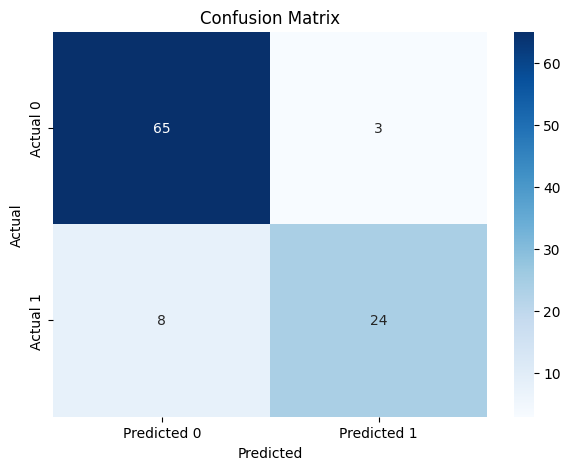

In [40]:
# Plotting the confusion matrix using Seaborn heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicted 0", "Predicted 1"], yticklabels=["Actual 0", "Actual 1"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
